<a href="https://colab.research.google.com/github/maberf/colabs/blob/main/DerivativosEx2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#CURSO MASTERS 2024-02
# Disciplina: DERIVATIVOS
# Professor: ANDRE MAIALY
# Exercício: ATIVIDADE 2 A - Simulações de Mote Carlo - Movimento Browniano Geométrico
# Alunos(s): MABER FERNANDES, LUCAS CORREA, PRISCILLA CARVALHO

In [31]:
# importação dos pacotes
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random

In [32]:
# inputs - variáveis e valores
to = 0
so = 100 # valor inicial do underlying
mi = 0.20 # valor de média em numérico de %
sigma = 0.30 # valor da volatilidade em numérico de %
t = 1 # período em anos

In [33]:
# parâmetros adicionais para a simulação do exercício
dt = 1/252 # base dia para ano base 252
flows = 80 # quantidade de fluxos
#
data = {'N': range(t*(252+1))} # 1 incremento a mais para fechar em ano(s)

In [34]:
# criação do dataframe
df = pd.DataFrame(data)
# carregamento da coluna com os incrementos de tempo
df['t'] = df['N'] * dt
# print(df)

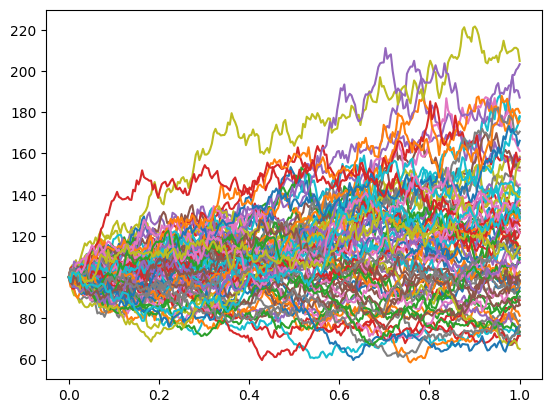

In [35]:
# recorrências aninhadas, fluxos, cálculos no dataframe e plotagem dos fluxos
# fluxos
for s in range(0, flows):
    flow = 'S'+str(s)
    df[flow] = so
    df[flow] = df['S'+str(s)].astype(float)
    # recorrência do cálculo no dataframe
    for i in range(1, len(df)):
        st = df.iloc[i - 1, s+2]
        df.iloc[i, s+2] = st+mi*st*dt+sigma*st*stats.norm.ppf(random.random(), loc=0, scale=math.sqrt(dt))
    # plotagem dos fluxos
    plt.plot(df['t'], df[flow], label=flow)
# acréscimo de legendas no gráfico
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
# print(df)

(array([3., 7., 1., 5., 9., 6., 8., 2., 6., 9., 4., 4., 2., 5., 1., 2., 3.,
        1., 0., 2.]),
 array([ 65.10881147,  72.09928332,  79.08975517,  86.08022702,
         93.07069887, 100.06117072, 107.05164257, 114.04211442,
        121.03258627, 128.02305811, 135.01352996, 142.00400181,
        148.99447366, 155.98494551, 162.97541736, 169.96588921,
        176.95636106, 183.94683291, 190.93730476, 197.92777661,
        204.91824846]),
 <BarContainer object of 20 artists>)

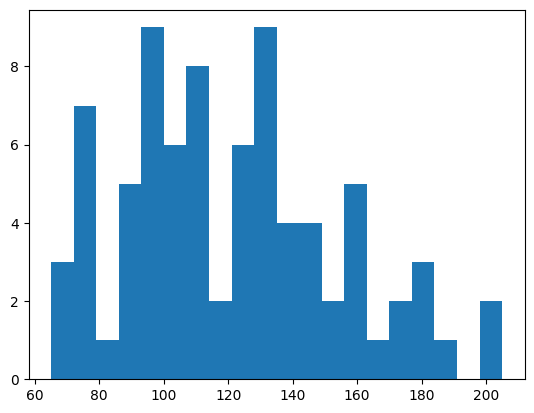

In [36]:
#plotagem histograma t = T
lastrow = t*252
plt.hist(df.iloc[lastrow, 2:], bins=20)